## Stacking the Best Models
<pre><b>This Kernel shows how the scores can be improved using Stacking Method.
Credit Goes to the following kernels
ref:
1. https://www.kaggle.com/filemide/distance-criskiev-hyparam-cont-1-662
2. https://www.kaggle.com/criskiev/distance-is-all-you-need-lb-1-481
3. https://www.kaggle.com/marcelotamashiro/lgb-public-kernels-plus-more-features
4. https://www.kaggle.com/scaomath/no-memory-reduction-workflow-for-each-type-lb-1-28
5. https://www.kaggle.com/fnands/1-mpnn/output?scriptVersionId=18233432
6. https://www.kaggle.com/harshit92/fork-from-kernel-1-481
7. https://www.kaggle.com/xwxw2929/keras-neural-net-and-distance-features
8. https://www.kaggle.com/marcogorelli/criskiev-s-distances-more-estimators-groupkfold?scriptVersionId=18843561
9. https://www.kaggle.com/toshik/schnet-starter-kit
10.https://www.kaggle.com/abazdyrev/nn-w-o-skew

</b></pre>

## Stat Stack

In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean
import seaborn as sns
%matplotlib inline
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

champs-scalar-coupling
chemistry-models



In [2]:
sub_path = "../input/chemistry-models"
all_files = os.listdir(sub_path)
all_files

['submission-1.618.csv',
 'submission-1.648.csv',
 'submission-1.619.csv',
 'submission-1.643.csv',
 'submission-1.674.csv',
 'submission-1.679.csv',
 'submission-1.610.csv',
 'submission-1.667.csv',
 'submission-1.681.csv',
 'submission-1.286.csv',
 'submission-1.658.csv',
 'submission-1.302.csv',
 'submission-1.663.csv',
 'submission-1.327.csv',
 'submission-1.415.csv',
 'submission-1.481.csv',
 'submission-1.672.csv']

In [3]:
import warnings
warnings.filterwarnings("ignore")
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "mol" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)
concat_sub.head()
ncol = concat_sub.shape[1]

In [4]:
# check correlation
concat_sub.iloc[:,1:].corr()

,mol0,mol1,mol2,mol3,mol4,mol5,mol6,mol7,mol8,mol9,mol10,mol11,mol12,mol13,mol14,mol15,mol16
mol0,1.000000,0.999914,0.999893,0.999982,0.991931,0.991931,0.983502,0.999980,0.999899,0.999850,0.999961,0.999826,0.999897,0.999845,0.999845,0.999965,0.999896
mol1,0.999914,1.000000,0.999944,0.999919,0.991974,0.991974,0.983553,0.999921,0.999944,0.999835,0.999913,0.999803,0.999941,0.999826,0.999828,0.999898,0.999940
mol2,0.999893,0.999944,1.000000,0.999897,0.991967,0.991967,0.983536,0.999900,0.999931,0.999811,0.999892,0.999781,0.999931,0.999805,0.999804,0.999877,0.999931
mol3,0.999982,0.999919,0.999897,1.000000,0.991934,0.991934,0.983509,0.999985,0.999903,0.999854,0.999966,0.999831,0.999901,0.999849,0.999849,0.999985,0.999900
mol4,0.991931,0.991974,0.991967,0.991934,1.000000,1.000000,0.953004,0.991936,0.992624,0.991854,0.991935,0.991826,0.991972,0.991853,0.991851,0.991910,0.992622
mol5,0.991931,0.991974,0.991967,0.991934,1.000000,1.000000,0.953004,0.991936,0.992624,0.991854,0.991935,0.991826,0.991972,0.991853,0.991851,0.991910,0.992622
mol6,0.983502,0.983553,0.983536,0.983509,0.953004,0.953004,1.000000,0.983511,0.982639,0.983424,0.983495,0.983389,0.983538,0.983412,0.983408,0.983488,0.982617
mol7,0.999980,0.999921,0.999900,0.999985,0.991936,0.991936,0.983511,1.000000,0.999906,0.999856,0.999970,0.999834,0.999903,0.999851,0.999851,0.999970,0.999902
mol8,0.999899,0.999944,0.999931,0.999903,0.992624,0.992624,0.982639,0.999906,1.000000,0.999821,0.999899,0.999790,0.999937,0.999817,0.999814,0.999880,0.999978
mol9,0.999850,0.999835,0.999811,0.999854,0.991854,0.991854,0.983424,0.999856,0.999821,1.000000,0.999848,0.999833,0.999817,0.999881,0.999842,0.999838,0.999817


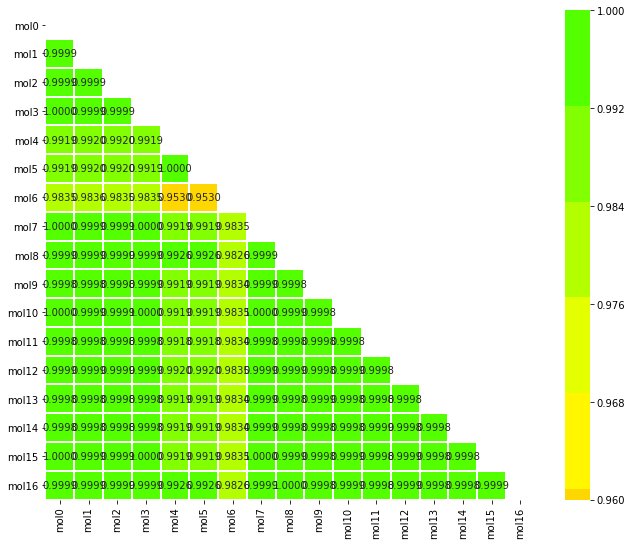

In [5]:
corr = concat_sub.iloc[:,1:].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='prism', vmin=0.96, center=0, square=True, linewidths=1, annot=True, fmt='.4f')

In [6]:
# get the data fields ready for stacking
concat_sub['m_max'] = concat_sub.iloc[:, 1:].max(axis=1)
concat_sub['m_min'] = concat_sub.iloc[:, 1:].min(axis=1)
concat_sub['m_median'] = concat_sub.iloc[:, 1:].median(axis=1)

In [7]:
concat_sub.describe()

,id,mol0,mol1,mol2,mol3,mol4,mol5,mol6,mol7,mol8,...,mol10,mol11,mol12,mol13,mol14,mol15,mol16,m_max,m_min,m_median
count,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,...,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06,2.505542e+06
mean,5.910918e+06,1.588590e+01,1.588320e+01,1.587951e+01,1.588595e+01,1.588460e+01,1.588460e+01,1.587690e+01,1.588603e+01,1.588214e+01,...,1.588607e+01,1.588276e+01,1.588111e+01,1.592437e+01,1.588650e+01,1.588651e+01,1.588054e+01,1.635943e+01,1.541345e+01,1.588134e+01
std,7.232878e+05,3.486285e+01,3.485671e+01,3.485677e+01,3.486263e+01,3.513931e+01,3.513931e+01,3.544416e+01,3.486278e+01,3.486111e+01,...,3.486318e+01,3.485652e+01,3.485843e+01,3.493039e+01,3.486398e+01,3.486222e+01,3.485870e+01,3.537405e+01,3.523683e+01,3.486289e+01
min,4.658147e+06,-3.318558e+01,-3.299384e+01,-3.706147e+01,-3.297185e+01,-3.315324e+01,-3.315324e+01,-1.011903e+04,-3.259560e+01,-3.309956e+01,...,-3.384381e+01,-2.871717e+01,-3.373225e+01,-2.474941e+01,-3.228784e+01,-3.224631e+01,-3.309956e+01,-2.372552e+01,-1.011903e+04,-3.234486e+01
25%,5.284532e+06,-2.455747e-01,-2.502056e-01,-2.484849e-01,-2.450764e-01,-2.453283e-01,-2.453283e-01,-2.468897e-01,-2.430994e-01,-2.461876e-01,...,-2.443731e-01,-2.153762e-01,-2.464247e-01,-2.278156e-01,-2.295558e-01,-2.440781e-01,-2.461876e-01,5.429665e-02,-5.294406e-01,-2.395662e-01
50%,5.910918e+06,2.282089e+00,2.282187e+00,2.279487e+00,2.281808e+00,2.281530e+00,2.281530e+00,2.276373e+00,2.280423e+00,2.278162e+00,...,2.281118e+00,2.306064e+00,2.278630e+00,2.290658e+00,2.293922e+00,2.281441e+00,2.278162e+00,2.649730e+00,1.928398e+00,2.276698e+00
75%,6.537303e+06,7.357853e+00,7.377225e+00,7.356561e+00,7.356357e+00,7.358020e+00,7.358020e+00,7.354875e+00,7.353614e+00,7.355285e+00,...,7.357556e+00,7.256915e+00,7.354947e+00,7.355250e+00,7.351437e+00,7.347124e+00,7.355285e+00,7.841720e+00,6.807266e+00,7.344945e+00
max,7.163688e+06,2.036310e+02,2.085859e+02,3.161125e+02,2.036596e+02,7.001663e+03,7.001663e+03,2.149311e+02,2.044570e+02,2.844774e+02,...,2.048760e+02,2.030659e+02,2.904867e+02,2.057290e+02,2.060015e+02,2.036153e+02,2.844774e+02,7.001663e+03,2.020187e+02,2.044570e+02


In [8]:
cutoff_lo = 0.8
cutoff_hi = 0.2

# Mean Stacking

In [9]:
rank = np.tril(concat_sub.iloc[:,1:ncol].corr().values,-1)
m_gmean = 0
n = 8
while rank.max()>0:
    mx = np.unravel_index(rank.argmax(), rank.shape)
    m_gmean += n*(np.log(concat_sub.iloc[:, mx[0]+1]) + np.log(concat_sub.iloc[:, mx[1]+1]))/2
    rank[mx] = 0
    n += 1

In [10]:
concat_sub['m_mean'] = np.exp(m_gmean/(n-1)**2)

In [11]:
concat_sub['scalar_coupling_constant'] = concat_sub['m_mean']
concat_sub[['id', 'scalar_coupling_constant']].to_csv('stack_mean.csv', 
                                        index=False, float_format='%.6f')

# Median Stacking

In [12]:
concat_sub['scalar_coupling_constant'] = concat_sub['m_median']
concat_sub[['id', 'scalar_coupling_constant']].to_csv('stack_median.csv', 
                                        index=False, float_format='%.6f')

# Pushout + Median Stacking
>* Pushout strategy is bit aggresive

In [13]:
concat_sub['scalar_coupling_constant'] = np.where(np.all(concat_sub.iloc[:,1:7] > cutoff_lo, axis=1), 1, 
                                    np.where(np.all(concat_sub.iloc[:,1:7] < cutoff_hi, axis=1),
                                             0, concat_sub['m_median']))
concat_sub[['id', 'scalar_coupling_constant']].to_csv('stack_pushout_median.csv', 
                                        index=False, float_format='%.6f')

# MinMax + Mean Stacking
>* MinMax seems more gentle and it outperforms the previous one

In [14]:
concat_sub['scalar_coupling_constant'] = np.where(np.all(concat_sub.iloc[:,1:7] > cutoff_lo, axis=1), 
                                    concat_sub['m_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:7] < cutoff_hi, axis=1),
                                             concat_sub['m_min'], 
                                             concat_sub['m_mean']))
concat_sub[['id', 'scalar_coupling_constant']].to_csv('stack_minmax_mean.csv', 
                                        index=False, float_format='%.6f')

# MinMax + Median Stacking

In [15]:
concat_sub['scalar_coupling_constant'] = np.where(np.all(concat_sub.iloc[:,1:7] > cutoff_lo, axis=1), 
                                    concat_sub['m_max'], 
                                    np.where(np.all(concat_sub.iloc[:,1:7] < cutoff_hi, axis=1),
                                             concat_sub['m_min'], 
                                             concat_sub['m_median']))
concat_sub[['id', 'scalar_coupling_constant']].to_csv('stack_minmax_median.csv', 
                                        index=False, float_format='%.6f')

## Averaging Ranks

In [16]:
concat_sub['scalar_coupling_constant'] = concat_sub['mol0'].rank(method ='min') + concat_sub['mol1'].rank(method ='min') + concat_sub['mol2'].rank(method ='min') 
concat_sub['scalar_coupling_constant'] = (concat_sub['scalar_coupling_constant']-concat_sub['scalar_coupling_constant'].min())/(concat_sub['scalar_coupling_constant'].max() - concat_sub['scalar_coupling_constant'].min())
concat_sub.describe()
concat_sub[['id', 'scalar_coupling_constant']].to_csv('stack_rank.csv', index=False, float_format='%.8f')

Best Results : Stack Median